# Exploratory Data Analysis

### Analysis of biases and political opinion data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

from scipy.stats import pearsonr

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\bias_total_pc_by_year.csv")

In [3]:
df = df.transpose().copy()

In [4]:
df.columns = ['anti_american_indian_or_alaska_native',
 'anti_arab',
 'anti_asian',
 'anti_atheism_agnosticism',
 'anti_bisexual',
 'anti_black_or_african_american',
 'anti_buddhist',
 'anti_catholic',
 'anti_eastern_orthodox_russian_greek_other',
 'anti_female',
 'anti_gay_male',
 'anti_gender_non_conforming',
 'anti_heterosexual',
 'anti_hindu',
 'anti_hispanic_or_latino',
 'anti_islamic_muslim',
 'anti_jehovahs_witness',
 'anti_jewish',
 'anti_lesbian_female',
 'anti_male',
 'anti_mental_disability',
 'anti_mormon',
 'anti_native_hawaiian_or_other_pacific_islander',
 'anti_physical_disability',
 'anti_protestant',
 'anti_sikh',
 'anti_transgender',
 'anti_white',
 'anti_lgbtq_grouped']

In [5]:
df = df[1:].copy()

In [6]:
df.reset_index(inplace=True)

In [7]:
df.rename(columns={'index':'year'}, inplace=True)

In [32]:
df.head()

,year,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism_agnosticism,anti_bisexual,anti_black_or_african_american,anti_buddhist,anti_catholic,anti_eastern_orthodox_russian_greek_other,...,anti_sikh,anti_transgender,anti_white,anti_lgbtq_grouped,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,0.021,0.013526,0.099662,0.001424,0.007475,1.04681,0.0,0.019932,0.0,...,0.0,0.0,0.322835,0.464497,35.0,50.0,50.0,50.0,25.0,31
1,2001,0.02749,0.089518,0.098681,0.001762,0.005286,1.030158,0.0,0.012688,0.0,...,0.0,0.0,0.290051,0.489175,35.0,50.0,48.2,50.0,25.0,31
2,2002,0.022697,0.028284,0.07647,0.000698,0.005587,0.891455,0.0,0.017808,0.0,...,0.0,0.0,0.281439,0.433681,35.0,50.0,44.6,50.0,25.0,31
3,2003,0.02458,0.004847,0.081701,0.003116,0.00277,0.891099,0.0,0.025964,0.0,...,0.0,0.0,0.288378,0.427201,32.6,47.0,43.2,46.0,44.0,24
4,2004,0.029156,0.0,0.076836,0.002058,0.005145,0.948439,0.0,0.019552,0.0,...,0.0,0.0,0.284017,0.398241,31.0,49.0,38.3,45.0,46.0,27


In [9]:
political_df = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\clean_pew_research.csv")

In [33]:
political_df.head()

,year,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,35.0,50.0,50.0,50.0,25.0,31
1,2001,35.0,50.0,48.2,50.0,25.0,31
2,2002,35.0,50.0,44.6,50.0,25.0,31
3,2003,32.6,47.0,43.2,46.0,44.0,24
4,2004,31.0,49.0,38.3,45.0,46.0,27


In [12]:
political_df.year = political_df.year.astype(str)

In [13]:
df = df.merge(political_df, on='year')

In [14]:
df.head()

,year,anti_american_indian_or_alaska_native,anti_arab,anti_asian,anti_atheism_agnosticism,anti_bisexual,anti_black_or_african_american,anti_buddhist,anti_catholic,anti_eastern_orthodox_russian_greek_other,...,anti_sikh,anti_transgender,anti_white,anti_lgbtq_grouped,percent_favor_gay_marriage,percent_accepting_homosexuality,percent_satisfied_with_current_us,percent_favor_immigrants,percent_agree_islam_encourages_violence,percent_agree_discrimination_hurts_black_people
0,2000,0.021,0.013526,0.099662,0.001424,0.007475,1.04681,0.0,0.019932,0.0,...,0.0,0.0,0.322835,0.464497,35.0,50.0,50.0,50.0,25.0,31
1,2001,0.02749,0.089518,0.098681,0.001762,0.005286,1.030158,0.0,0.012688,0.0,...,0.0,0.0,0.290051,0.489175,35.0,50.0,48.2,50.0,25.0,31
2,2002,0.022697,0.028284,0.07647,0.000698,0.005587,0.891455,0.0,0.017808,0.0,...,0.0,0.0,0.281439,0.433681,35.0,50.0,44.6,50.0,25.0,31
3,2003,0.02458,0.004847,0.081701,0.003116,0.00277,0.891099,0.0,0.025964,0.0,...,0.0,0.0,0.288378,0.427201,32.6,47.0,43.2,46.0,44.0,24
4,2004,0.029156,0.0,0.076836,0.002058,0.005145,0.948439,0.0,0.019552,0.0,...,0.0,0.0,0.284017,0.398241,31.0,49.0,38.3,45.0,46.0,27


In [34]:
us_data = pd.read_csv(r"C:\Users\14802\Desktop\hate-crime analysis\datasets\us_per_cap_totals.csv")

In [37]:
us_data = us_data[['year', 'total_incidents_per_capita']].copy()

In [40]:
us_data.year = us_data.year.astype(str)

In [41]:
df = df.merge(us_data, on='year')

In [43]:
df.rename(columns={"total_incidents_per_capita":"us_total_crimes_per_capita"}, inplace=True)

## Exploratory Question: 

### Is there a relationship between the percentage of people who believe homomsexuality should be accepted  by society and the amount of anti-gay or anti-lesbian hate crimes per capita?

In [15]:
pearsonr(df['anti_gay_male'], df['percent_accepting_homosexuality'])

(-0.5055942779471553, 0.01937866776998959)

The coefficient of -0.5055942779471553 and p-value of 0.01937866776998959 show a **moderate negative relationship which is statistically significant** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

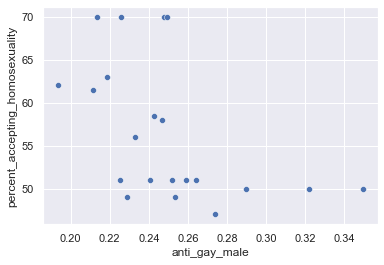

In [22]:
sns.scatterplot(x=df['anti_gay_male'], y=df['percent_accepting_homosexuality']);

In [17]:
pearsonr(df['anti_lesbian_female'], df['percent_accepting_homosexuality'])

(-0.8017499838057306, 1.243257264362834e-05)

The coefficient of -0.8017499838057306 and p-value of 1.243257264362834e-05 show a **strong negative relationship with a high statistical significance** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

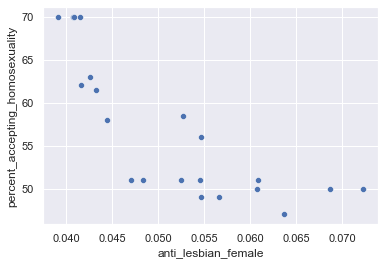

In [19]:
sns.scatterplot(data=df, x=df['anti_lesbian_female'], y=df['percent_accepting_homosexuality']);

## Exploratory Question: 

### Is there a relationship between the percentage of people who support gay and lesbian marriage and the amount of anti-gay or anti-lesbian hate crimes per capita?

In [23]:
pearsonr(df['anti_gay_male'], df['percent_favor_gay_marriage'])

(-0.5542383764685134, 0.009129605621183317)

The coefficient of -0.5542383764685134 and p-value of 0.009129605621183317 show a **moderate negative relationship which is statistically significant** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

<AxesSubplot:xlabel='anti_gay_male', ylabel='percent_favor_gay_marriage'>

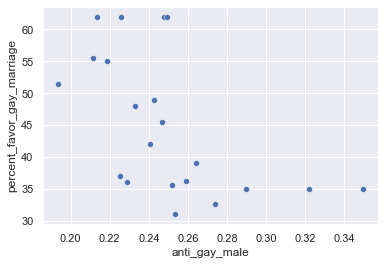

In [25]:
sns.scatterplot(data=df, x=df['anti_gay_male'], y=df['percent_favor_gay_marriage'])

In [24]:
pearsonr(df['anti_lesbian_female'], df['percent_favor_gay_marriage'])

(-0.8174220397019577, 6.0704623900791915e-06)

The coefficient of -0.8174220397019577 and p-value 6.0704623900791915e-06 show a **strong negative relationship with a high statistical significance** (generally, the lower the p-value, the higher the statistical significance. Anything below .05 is typically considered statistically significant). 

<AxesSubplot:xlabel='anti_lesbian_female', ylabel='percent_favor_gay_marriage'>

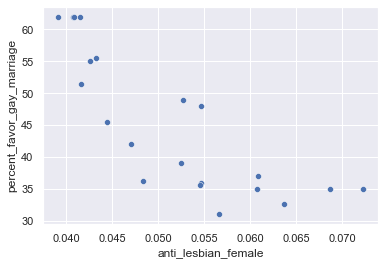

In [26]:
sns.scatterplot(data=df, x=df['anti_lesbian_female'], y=df['percent_favor_gay_marriage'])

## Exploratory Question: 

### Is there a relationship between the percentage of people who agree Islamic beliefs encourage violence and the amount of anti-islamic hate crimes per capita?

In [27]:
pearsonr(df['anti_islamic_muslim'], df['percent_agree_islam_encourages_violence'])

(-0.20605504950694012, 0.3701921047027624)

Because the p-value here is well above .05, these results suggest no statistically significant relationship between the amount of anti-islamic hate crimes and the percentage of people who think Islam encourages violence among its members. 

<AxesSubplot:xlabel='anti_islamic_muslim', ylabel='percent_agree_islam_encourages_violence'>

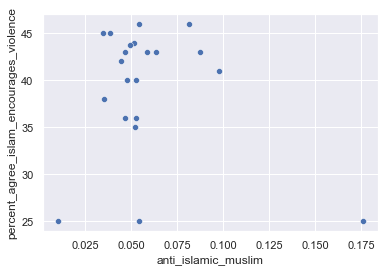

In [28]:
sns.scatterplot(data=df, x=df['anti_islamic_muslim'], y=df['percent_agree_islam_encourages_violence'])

As expected by the pearsonr calculation results, there does not appear to be any relationship between the amount of anti-islamic hate crimes and the percentage of people who think Islam encourages violence among its members. 

## Exploratory Question: 

### Is there a relationship between the percentage of people who agree racial discrimination makes it hard for many black people to "get ahead" and the amount of anti-black hate crimes per capita?

In [29]:
pearsonr(df['anti_black_or_african_american'], df['percent_agree_discrimination_hurts_black_people'])

(0.035836716210967554, 0.8774383232202404)

Based on the coeffiecient of 0.0358 and p-value of 0.878, there is no observed relationship between the amount of anti-black hate crimes and the percent of people who agree that racial discrimination hurts black peoples' ability to get ahead. (For correlation, the closer the value is to -1 or 1, the higher the correlation. For p-value, the results are not considered statistically significant unless the p-value is under 0.05). 

<AxesSubplot:xlabel='anti_black_or_african_american', ylabel='percent_agree_discrimination_hurts_black_people'>

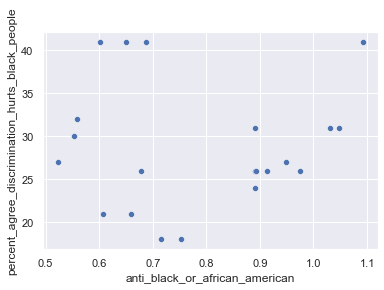

In [31]:
sns.scatterplot(data=df, x=df['anti_black_or_african_american'], y=df['percent_agree_discrimination_hurts_black_people'])

As expected by the pearsonr calculation above, there is no apparent relationship between the amount of anti-black hate crimes and the percent of people who agree that racial discrimination hurts black peoples' ability to get ahead.

## Exploratory Question: 

### Is there a relationship between the total amount of hate crimes per capita across the U.S. and the percentage of people who said they were satisfied with the way things were going in the U.S. each year?

In [44]:
pearsonr(df['us_total_crimes_per_capita'], df['percent_satisfied_with_current_us'])

(0.6345704446811915, 0.0020021476662400216)

<AxesSubplot:xlabel='us_total_crimes_per_capita', ylabel='percent_satisfied_with_current_us'>

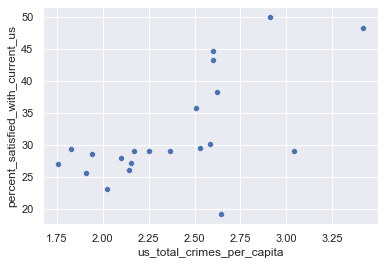

In [45]:
sns.scatterplot(data=df, x=df['us_total_crimes_per_capita'], y=df['percent_satisfied_with_current_us'])

These results are defeinitely surprising. It is important to remember that correlation does not equal causation. Going into this, I thought there might be a correlation between a larger percentage of people being unhappy with the current U.S. situation and a smaller amount of hate crimes, but it seems that hypothesis is not correct.

This pearsonr correlation shows a moderately strong correlation between the percentage of people satisfied with the current situation in the U.S. and the amount of hate crimes per capita across the U.S. (correlation of 0.63457 and p-value of 0.002).

Again, just because there is a correlation does not mean there is any causation. Common sense tells me this is most likely pure coincidental correlation. 